In [1]:
%matplotlib inline

import os
import sys
sys.path.append(os.path.join(os.getcwd(), '..'))
from collections import defaultdict
import math

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob
from mpl_toolkits.mplot3d import Axes3D

from sklearn.manifold import TSNE, MDS, Isomap
from sklearn.decomposition import PCA, KernelPCA

import torch
from torch.utils.data import DataLoader

from src.datasets.manifolds import SwissRoll, SCurve, Spheres
from src.evaluation.utils import get_space

#from src.datasets.splitting import split_dataset

torch.manual_seed(42)
np.random.seed(42)

In [2]:
batch_size = 64
train = True
datasets_ = {'dataset.SwissRoll': SwissRoll(train=train), 'dataset.SCurve': SCurve(train=train),
             'dataset.Spheres': Spheres(train=train)}
experiments = defaultdict(lambda:defaultdict(dict))
for f in sorted(glob.glob('../exp_runs/train_model/mlpautoencoder_dimred_cycles/**/run.json', recursive=True)):
    d = os.path.dirname(f)
    dataset, method = d.split('/')[-2:]
    print(dataset, method)
    path = os.path.join(d, 'model.pth')
    
    dataloader = DataLoader(datasets_[dataset], batch_size=batch_size, shuffle=False,
            pin_memory=True, drop_last=True)
    
    experiments[dataset]['data_space'] = get_space(None, dataloader, mode='data')[0]

    model = torch.load(path)

    #Keep path, model, and latent space in dict:
    experiments[dataset][method]['path'] = path 
    experiments[dataset][method]['model'] = model

    latent, labels = get_space(model, dataloader, mode='latent')

    experiments[dataset][method]['latent'] = latent
    experiments[dataset][method]['labels'] = labels

dataset.SCurve model.TopoReg
dataset.SCurve model.TopoRegEdgeSymmetric
dataset.SCurve model.TopoRegVertex
dataset.Spheres model.TopoReg
dataset.Spheres model.TopoRegEdgeSymmetric
dataset.Spheres model.TopoRegVertex
dataset.SwissRoll model.TopoReg
dataset.SwissRoll model.TopoRegEdgeSymmetric
dataset.SwissRoll model.TopoRegVertex


In [3]:
n_samples = 10000

In [4]:
def plotting(transformed, all_labels, title):
    plt.scatter(transformed[:, 0], transformed[:, 1], c=all_labels, cmap=plt.cm.Spectral, s=2., alpha=0.5)
    plt.title(title)

def plott_all(dataset_name, X,labels, methods, all_Z):
    fig = plt.figure(1)
    n_cols = 3
    n_rows = math.ceil((len(methods) + 1) / n_cols)
    ax = fig.add_subplot(n_rows, n_cols, 1, projection="3d")
    
    #Plot Swiss Roll Data:
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap=plt.cm.Spectral, s=2., alpha=0.5)

    plt.xticks([]), plt.yticks([])
    myfontsize = 18
    plt.title(dataset_name, fontsize=myfontsize)
    ax.set_xlabel('x', fontsize=myfontsize)
    ax.set_ylabel('y', fontsize=myfontsize)
    ax.set_zlabel('z', fontsize=myfontsize)
    fig.set_size_inches(n_cols*4, n_rows*4)
    ax.view_init(15, 290) # rotation of the 3D plot
    # plt.show()
    
    subplot_count = 2
    for method, latent in zip(methods, all_Z):
        #add subplots for latent spaces:
        ax = fig.add_subplot(n_rows, n_cols, subplot_count)
        method = method.split('.')[1]
        plotting(latent, labels, f'2D Latent Space {method}')
        subplot_count += 1
 
    # hard-coded:
    #     ax = fig.add_subplot(322)
    #     plotting(all_Z[0], labels, f'2D Latent Space {methods[0]}')

    #     ax = fig.add_subplot(323)
    #     plotting(all_Z[1], labels, f'2D Latent Space {methods[1]}')

    #     ax = fig.add_subplot(324)
    #     plotting(all_Z[2], labels, f'2D Latent Space {methods[2]}')

    #     ax = fig.add_subplot(325)
    #     plotting(all_Z[3], labels, f'2D Latent Space {methods[3]}')

    #     ax = fig.add_subplot(326)
    #     plotting(all_Z[4], labels, f'2D Latent Space {methods[4]}')
    
    

In [5]:
experiments['dataset.SCurve'].keys()

dict_keys(['data_space', 'model.TopoReg', 'model.TopoRegEdgeSymmetric', 'model.TopoRegVertex'])

model.TopoReg
model.TopoReg
model.TopoRegEdgeSymmetric
model.TopoRegVertex


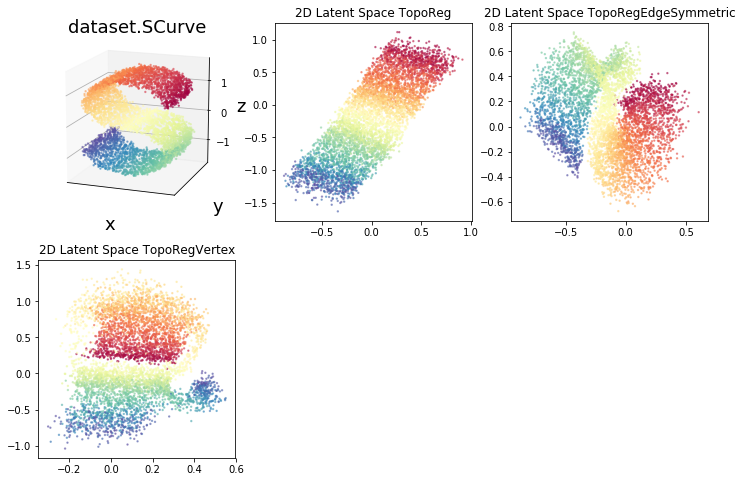

model.TopoReg
model.TopoReg
model.TopoRegEdgeSymmetric
model.TopoRegVertex


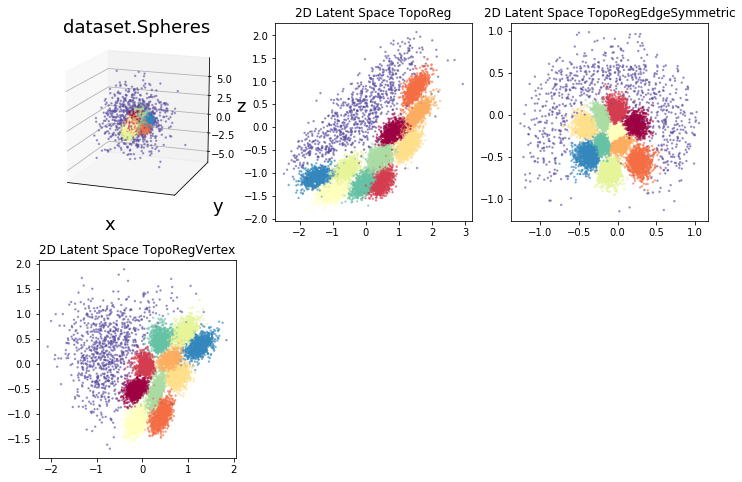

model.TopoReg
model.TopoReg
model.TopoRegEdgeSymmetric
model.TopoRegVertex


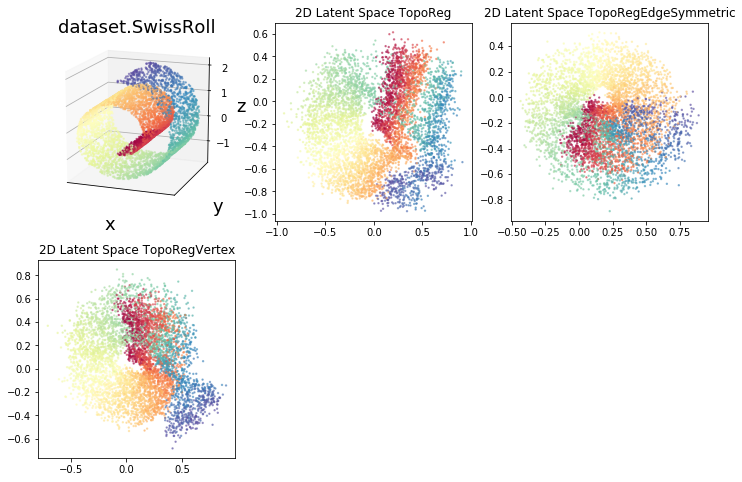

<Figure size 432x288 with 0 Axes>

In [6]:
%matplotlib inline

dataset= 'dataset.SCurve' #'swissroll' #'scurve' #'spheres'
for dataset in experiments.keys():

    X = experiments[dataset]['data_space']
    some_model = list((key for key in experiments[dataset].keys() if key.startswith('model')))[0]
    print(some_model)
    labels = experiments[dataset][some_model]['labels']

    methods = []
    all_Z = []
    for key, value in experiments[dataset].items():
        if key.startswith('model'):
            print(key)
            methods.append(key)
            all_Z.append(value['latent'])
    plott_all(dataset, X, labels, methods, all_Z)
    plt.show()
    plt.savefig(f'{dataset}.png', dpi=200)


#Z2 = experiments[dataset][methods[4]]['latent']


# plt.savefig(f'200_epochs_{dataset}_train.png')